In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [4]:
train_dataset = './datasets/archive/sign_mnist_train.csv'
test_dataset= './datasets/archive/sign_mnist_test.csv'

In [5]:
train_df = pd.read_csv(train_dataset)
test_df = pd.read_csv(test_dataset)

In [6]:
len(train_df)

27455

In [8]:
x_train = train_df.iloc[0:27455, 1:785].values
y_train = train_df.iloc[0:27455, 0].values

In [14]:
pixel_number = np.arange(0,784,1)

In [15]:
x_test = test_df.iloc[0:7172, 1:785].values
y_test = test_df.iloc[0:7172,0].values

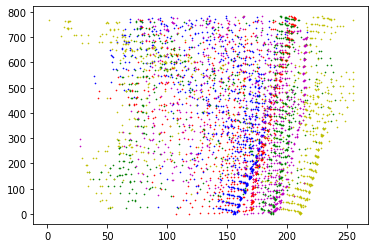

In [18]:
plt.scatter(x_train[0],pixel_number, s=0.4, c = 'r')
plt.scatter(x_train[1],pixel_number, s=0.4, c = 'b')
plt.scatter(x_train[2],pixel_number, s=0.4, c = 'g')
plt.scatter(x_train[3],pixel_number, s=0.4, c = 'y')
plt.scatter(x_train[4],pixel_number, s=0.4, c = 'm')
plt.show()

In [19]:
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

In [29]:
y_test[:10]

array([ 6,  5,  9,  0,  3, 20,  9, 13,  3,  7])

<br/>

In [21]:
KNN = KNeighborsClassifier(n_neighbors=165)
classifier = KNN.fit(x_train, y_train)

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
acc = accuracy_score(y_test, y_pred)

In [25]:
f1 = f1_score(y_test, y_pred, average='micro')
cm = confusion_matrix(y_test, y_pred)

In [26]:
print(acc)
print(f1)
print(cm)

0.6079196876742889
0.6079196876742889
[[322   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   4]
 [  1 296   0  43   0   0   0   4   0  49   0   0   0   0   2   0  21   0
    0  10   5   1   0   0]
 [  0   0 303   0   0   0   1   0   0   0   2   0   0   4   0   0   0   0
    0   0   0   0   0   0]
 [  0  13   0 204   0   0   0   0   0   8   0   0   2   0   0   0   7   0
    2   6   1   1   1   0]
 [  7  27   0   0 408   0   0   0   4   0   0   2  21   0   0   0   0  29
    0   0   0   0   0   0]
 [  0  22   3  10   0 148  15   0   0   0   0   0   0   3   0   3   1   0
   22  13   5   1   0   1]
 [  0   0   0  12   0  11 270  20   0   0   0   0   0   0   0   1   0   0
   34   0   0   0   0   0]
 [  0   6   0   0   0   0 113 302   0   0   0   0   0   0   0   0   0   0
   13   0   2   0   0   0]
 [ 33  24   0   2   4   0   0   0 167   0   0   2   4   0   0   0   0  28
   23   0   0   0   0   1]
 [  0   3   0  18   0   0   1   1  14 111   0   0   0